In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [116]:
dfx = pd.read_csv('XAccel.csv',skiprows=[0,1,2,4],usecols=[0,1],nrows=60000)
dfy = pd.read_csv('YAccel.csv',skiprows=[0,1,2,4],usecols=[0,1],nrows=60000)
dfz = pd.read_csv('ZAccel.csv',skiprows=[0,1,2,4],usecols=[0,1],nrows=60000)
dfy

,Time,Raw
0,0.00000,-0.070647
1,0.00005,-0.064546
2,0.00010,-0.058750
3,0.00015,-0.053443
4,0.00020,-0.048847
...,...,...
59995,2.99975,-0.078335
59996,2.99980,-0.077652
59997,2.99985,-0.077070
59998,2.99990,-0.076591


In [129]:
def tweak_xyz(dfx,dfy,dfz):
    
    def tweak(df):
        return (df
                .assign(Average = df
                        .Raw
                        .rolling(wind,center=True,min_periods=1)
                        .mean()
                       )
                .Average)
    dt = dfx.Time[1] - dfx.Time[0]
    wind = int(.010//dt)
    return pd.concat([dfx.Time,tweak(dfx),tweak(dfy),tweak(dfz)],axis=1,keys=['Time','X','Y','Z'])

tweak_xyz(dfx,dfy,dfz)

,Time,X,Y,Z
0,0.00000,-5.322966,0.478486,1.014260
1,0.00005,-5.357530,0.449399,0.909854
2,0.00010,-5.396230,0.418753,0.798425
3,0.00015,-5.440839,0.386957,0.681069
4,0.00020,-5.493066,0.354433,0.558945
...,...,...,...,...
59995,2.99975,0.270924,-0.080070,0.263744
59996,2.99980,0.271010,-0.080051,0.263706
59997,2.99985,0.271096,-0.080036,0.263679
59998,2.99990,0.271183,-0.080024,0.263662


In [121]:
dfx['Average'] = dfx['Average.1'].replace(' ',np.nan).astype('float')
dfx = dfx.drop('Average.1',axis=1)

KeyError: 'Average.1'

In [105]:
dt = dfx.Time[1] - dfx.Time[0]
wind = int(.010//dt)
wind

199

In [106]:
dfx['Rawavg'] = (dfx.Raw.rolling(wind,
                                center=True,
                                min_periods=1
                                )
                 .mean())
dfx[500:600]

,Time,Raw,Average,Rawavg
500,0.02500,-58.263152,-47.117336,-47.117336
501,0.02505,-59.692970,-47.131109,-47.131109
502,0.02510,-61.114839,-47.145316,-47.145316
503,0.02515,-62.513559,-47.159641,-47.159641
504,0.02520,-63.873482,-47.173859,-47.173859
...,...,...,...,...
595,0.02975,-32.053919,-33.785843,-33.785843
596,0.02980,-31.226040,-33.541128,-33.541128
597,0.02985,-30.379763,-33.288598,-33.288598
598,0.02990,-29.529819,-33.028154,-33.028154


(0.0, 0.05)

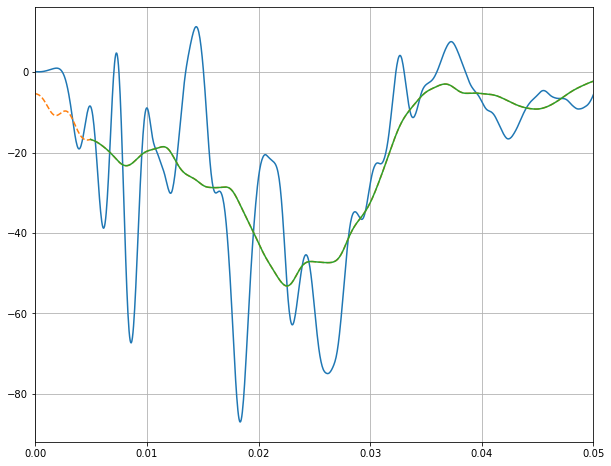

In [107]:
plt.figure(figsize=(10,8))
plt.plot(dfx.Time,dfx.Raw,'-')
plt.plot(dfx.Time,dfx.Rawavg,'--')
plt.plot(dfx.Time,dfx.Average)
plt.grid()
plt.xlim(0,.05)

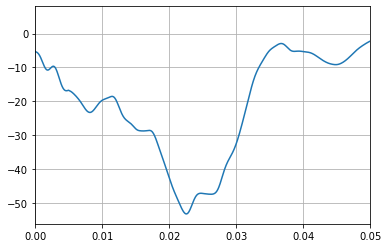

In [114]:
plt.plot(tweak_x(dfx).Time,tweak_x(dfx).Average)
plt.xlim(0,.05)
plt.grid()

In [131]:
increment = 30008/1000

In [132]:
dt = 1/30008

In [133]:
dt

3.332444681418288e-05

In [146]:
num_images=(.04//dt//increment)

In [147]:
num_images

39.0